In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [7]:
emp_attrition = pd.read_csv("C:/Users/user/Downloads/employee_attrition.csv")

In [8]:
emp_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
emp_attrition.shape

(1470, 35)

In [10]:
emp_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
emp_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# To check for missing values in the dataset
missing_value = 100* emp_attrition.isnull().sum()/len(emp_attrition)
missing_value

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [13]:
#To check how many unique values each feature has
for feature in emp_attrition.columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('1. Unique values:',emp_attrition[feature].unique())
    print(' ')
    print('***************-end-******************************')


 
************* Column name: Age *************
1. Unique values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
 
***************-end-******************************

 
************* Column name: Attrition *************
1. Unique values: ['Yes' 'No']
 
***************-end-******************************

 
************* Column name: BusinessTravel *************
1. Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 
***************-end-******************************

 
************* Column name: DailyRate *************
1. Unique values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 12

In [14]:
for column in emp_attrition.columns:
    if emp_attrition[column].dtype == np.object:
        print(str(column))

C:\Users\user\AppData\Local\Temp\ipykernel_2328\2673000904.py:2: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if emp_attrition[column].dtype == np.object:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [15]:
number_col = ['Age',
'DailyRate',
'DistanceFromHome',
'Education',
'EmployeeNumber',
'EnvironmentSatisfaction',
'HourlyRate',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'PerformanceRating',
'RelationshipSatisfaction',
'StockOptionLevel',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager',
'Attrition_yes']

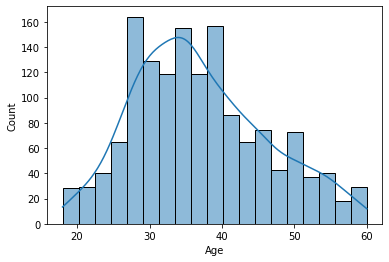

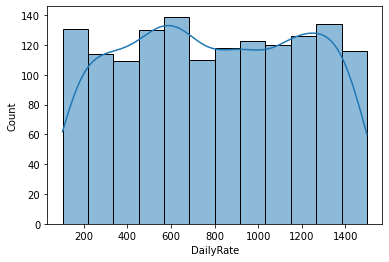

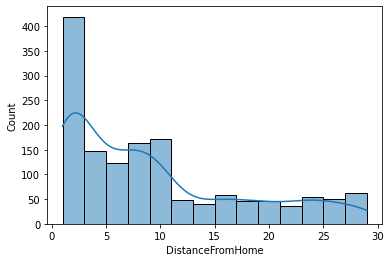

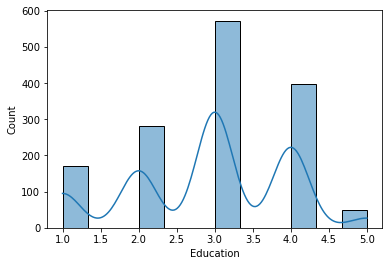

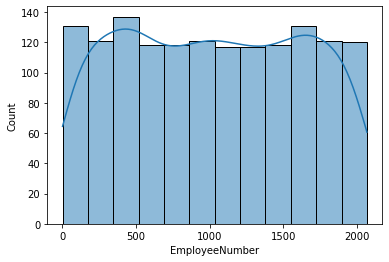

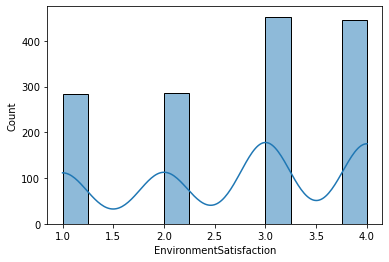

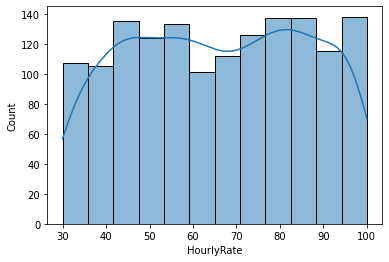

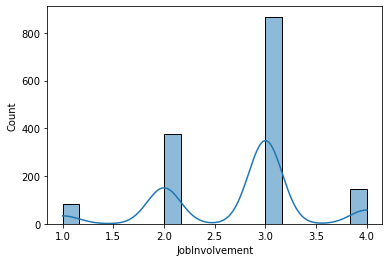

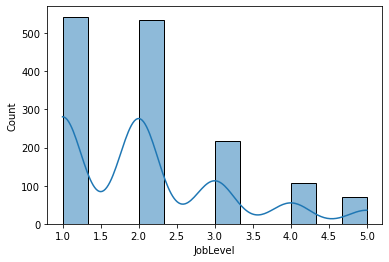

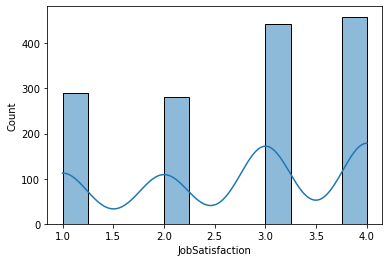

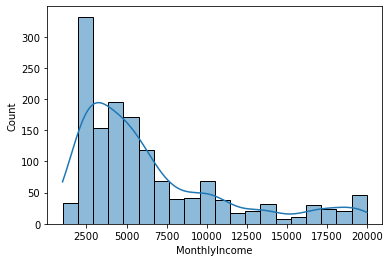

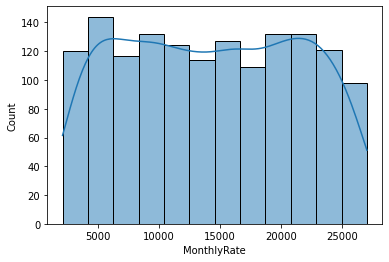

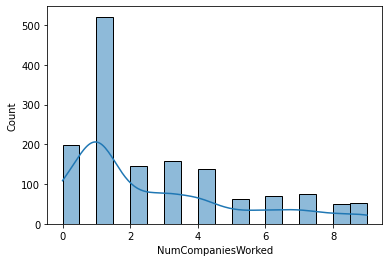

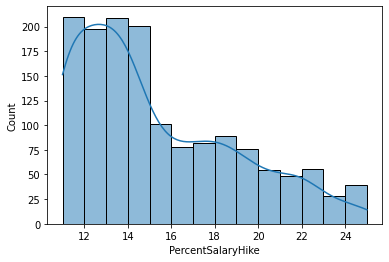

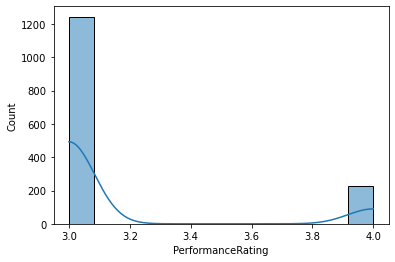

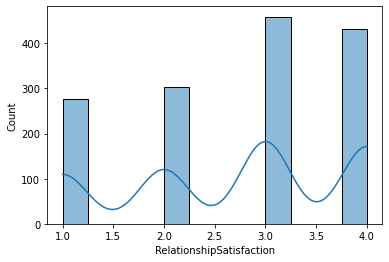

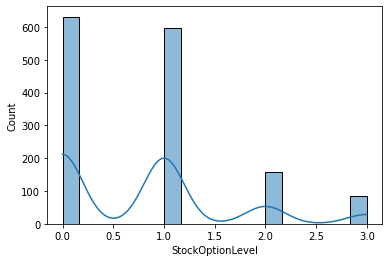

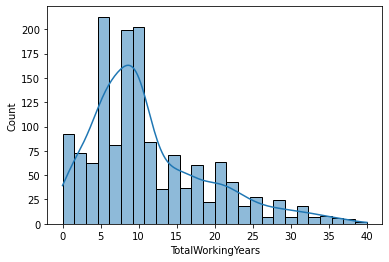

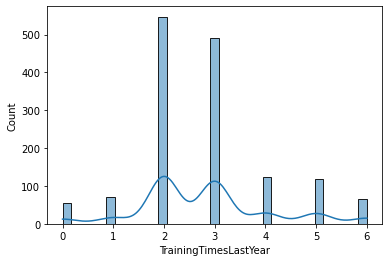

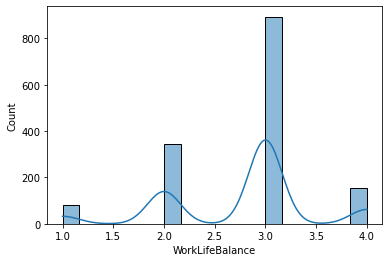

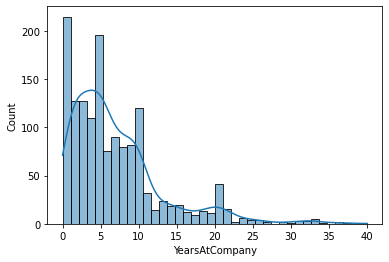

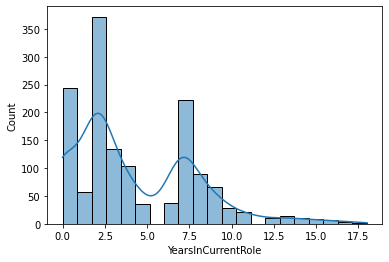

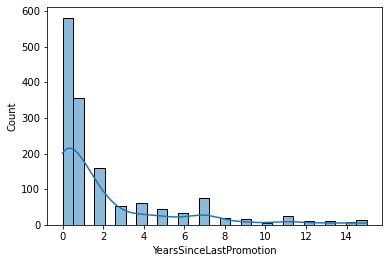

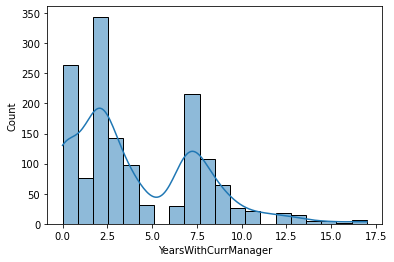

In [12]:
for i in list(number_col[:-1]):
    sns.histplot(emp_attrition[i],kde=True)
    plt.show()

In [13]:
categorical_col = ['Attrition',
'BusinessTravel',
'Department',
'EducationField',
'Gender',
'JobRole',
'MaritalStatus',
'Over18',
'OverTime']

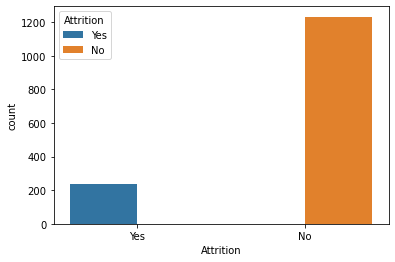

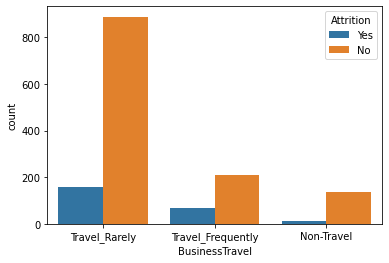

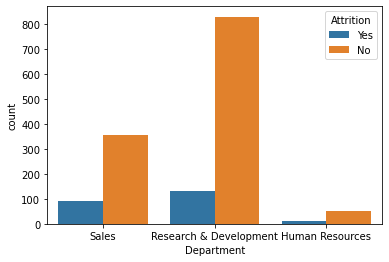

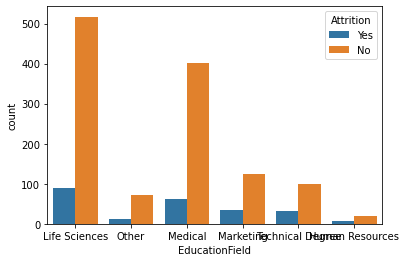

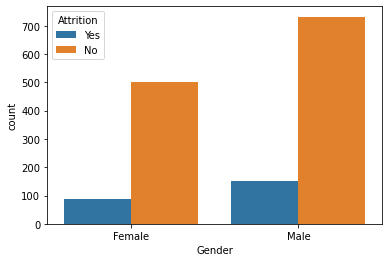

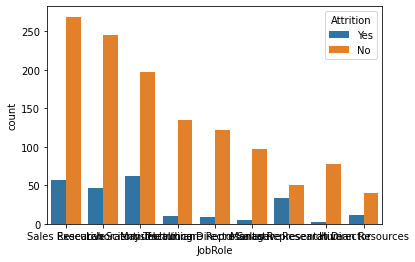

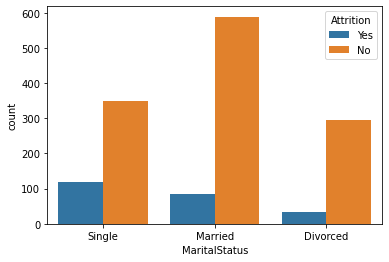

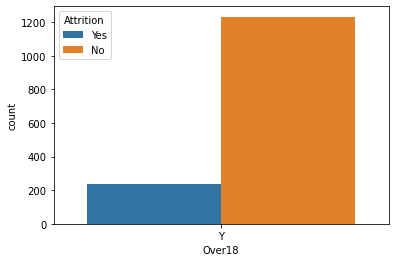

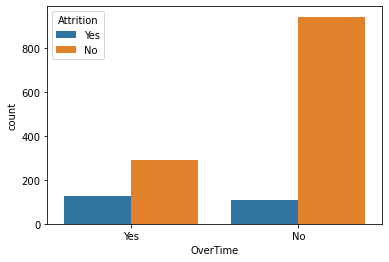

In [14]:
for i in list(categorical_col):
    sns.countplot(x=emp_attrition[i],hue=emp_attrition['Attrition'])
    plt.show()

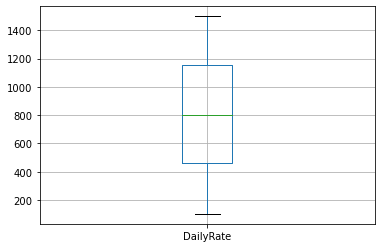

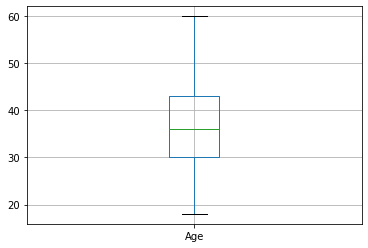

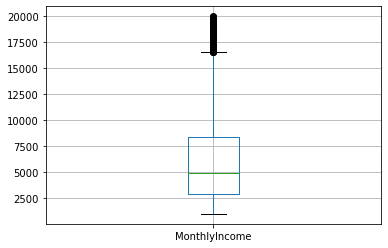

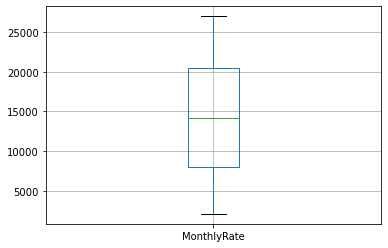

In [15]:
emp_attrition.boxplot(column="DailyRate")
plt.show()
emp_attrition.boxplot(column="Age")
plt.show()
emp_attrition.boxplot(column="MonthlyIncome")
plt.show()
emp_attrition.boxplot(column="MonthlyRate")
plt.show()

<AxesSubplot:>

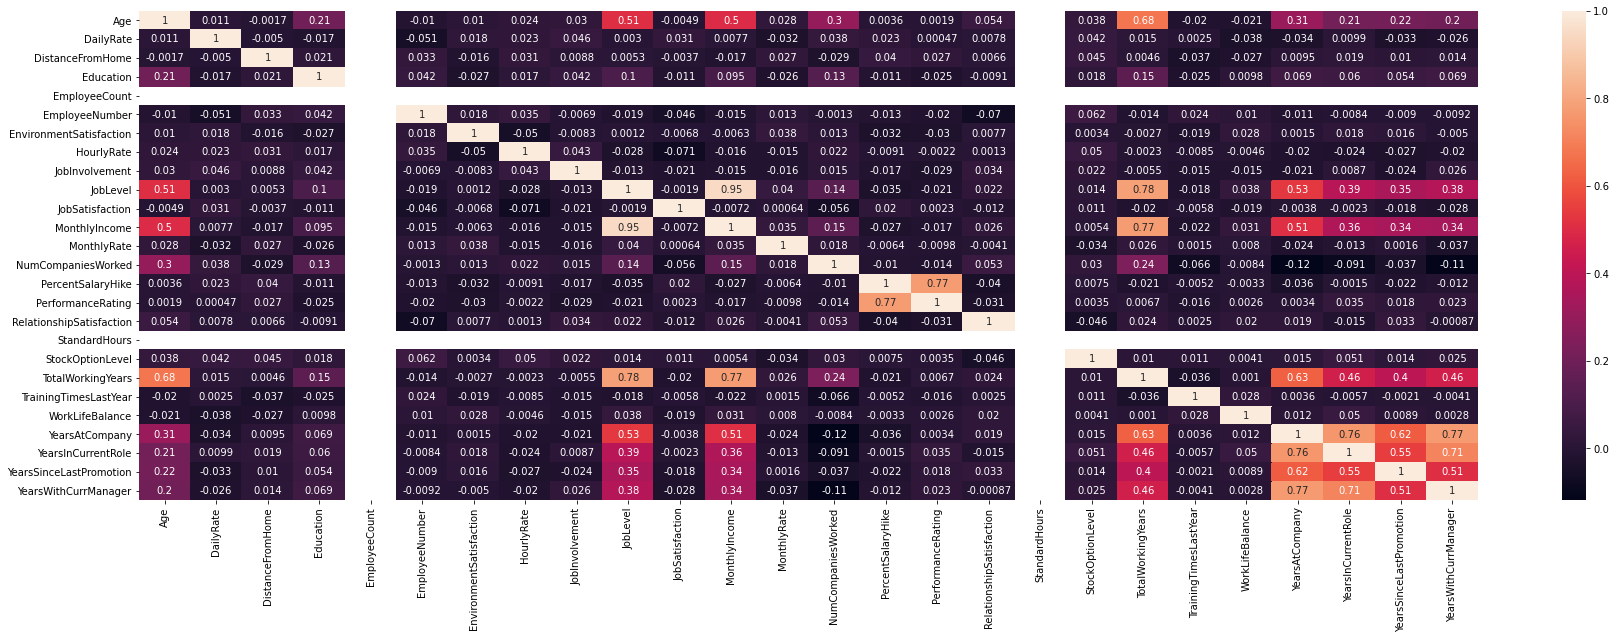

In [16]:
plt.figure(figsize=(30,9))
sns.heatmap(emp_attrition.corr(),annot=True)

In [17]:
attrition_count = pd.DataFrame(emp_attrition['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x18005106d30>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

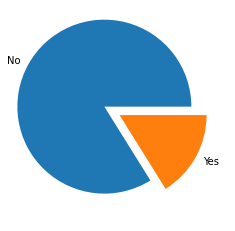

In [18]:
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

D:\Users\Siddhant Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

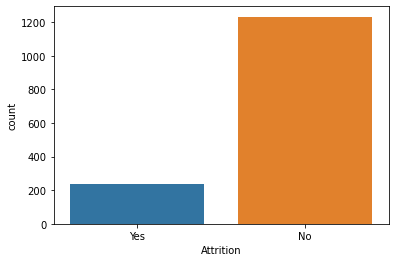

In [19]:
sns.countplot(emp_attrition['Attrition'])

In [20]:
emp_attrition.drop(['EmployeeCount' , 'EmployeeNumber'] , axis = 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [21]:
attrition_dummies = pd.get_dummies(emp_attrition['Attrition'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [22]:
emp_attrition = pd.concat([emp_attrition, attrition_dummies] , axis = 1)
emp_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0


In [23]:
emp_attrition = emp_attrition.drop(['Attrition' , 'No'] , axis = 1)
emp_attrition.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


<AxesSubplot:xlabel='Gender', ylabel='Yes'>

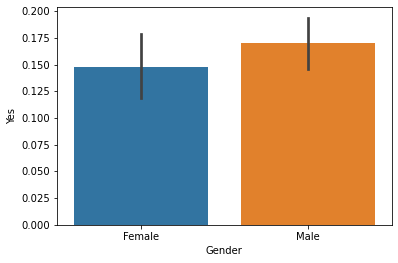

In [24]:
sns.barplot(x = 'Gender' , y = 'Yes', data = emp_attrition)

<AxesSubplot:xlabel='Department', ylabel='Yes'>

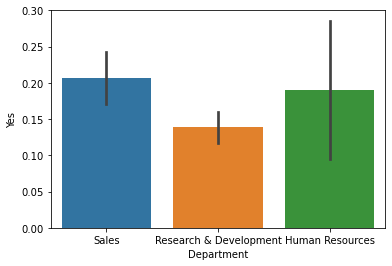

In [25]:
sns.barplot(x = 'Department', y = 'Yes', data = emp_attrition)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Yes'>

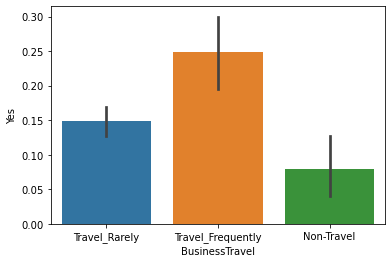

In [26]:
sns.barplot(x = 'BusinessTravel', y = 'Yes', data = emp_attrition)

In [27]:
#Converting String columns into integers
from sklearn.preprocessing import LabelEncoder
for column in emp_attrition.columns:
    if emp_attrition[column].dtype==np.number:
        continue
    else:
        emp_attrition[column]=LabelEncoder().fit_transform(emp_attrition[column])

<ipython-input-27-62a877a44590>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if emp_attrition[column].dtype==np.number:


In [28]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [29]:
x  = emp_attrition.drop(['Yes'], axis = 1)
y = emp_attrition['Yes']

In [30]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [31]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,12,2,295,2,4,2,2,0,338,3,...,2,0,3,10,2,2,10,9,1,2
363,15,2,159,2,4,2,2,0,363,3,...,1,0,0,1,2,2,1,0,0,0
759,27,2,437,0,23,3,3,0,759,1,...,0,0,0,6,3,2,6,3,0,4
793,10,2,502,1,14,1,1,0,793,0,...,3,0,1,4,5,1,4,2,2,2
581,12,2,516,1,0,2,1,0,581,3,...,2,0,2,7,2,2,2,2,0,2


In [33]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
rf.score(x_train, y_train)

0.9854227405247813

In [37]:
#Predicting for x_test
pred = rf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8480725623582767

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format((TP + TN / (TP + TN + FN + FP))))

[[366   5]
 [ 62   8]]
Model Testing Accuracy = 8.829931972789115


In [40]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
depths,score_train,score_predict = [3,4,5,6,8,10,12,14,16,18,20],[],[]
for depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    dtc.fit(x_train,y_train)
    y_ptrain = dtc.predict(x_train)
    y_predict = dtc.predict(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)

In [42]:
dct.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [43]:
y_pred = dct.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[343,  28],
       [ 48,  22]], dtype=int64)

In [46]:
dct.score(x_train, y_train)

0.8843537414965986

In [47]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

0.8276643990929705